---
## Banking Term Deposit Subscription Classification Project
---

A retail bank has conducted a series of direct marketing campaigns via phone calls to promote term deposit subscriptions. The bank wants to use machine learning to predict whether a customer will subscribe to a term deposit based on demographic, financial, and campaign-related attributes.

### Objective

Develop a classification model that accurately predicts the likelihood of a customer subscribing to a term deposit using historical campaign data. This can help the bank to:
- Improve targeting for future campaigns
- Reduce marketing costs
- Increase campaign success rates

### Dataset Overview

- **Records:** 45,211
- **Columns:** 17
- **Description:** Information collected during direct marketing calls

| Column     | Description                                                        |
|------------|--------------------------------------------------------------------|
| age        | Age of the customer                                                |
| job        | Type of job (e.g., admin, technician, entrepreneur, etc.)          |
| marital    | Marital status (e.g., single, married, divorced)                   |
| education  | Level of education (e.g., primary, secondary, tertiary)            |
| default    | Whether the customer has credit in default (yes/no)                |
| balance    | Account balance                                                    |
| housing    | Whether the customer has a housing loan (yes/no)                   |
| loan       | Whether the customer has a personal loan (yes/no)                  |
| contact    | Contact communication type (e.g., cellular, telephone, unknown)    |
| day        | Last contact day of the month                                      |
| month      | Last contact month                                                 |
| duration   | Duration of the last contact in seconds                            |
| campaign   | Number of contacts performed during this campaign                  |
| pdays      | Days since the client was last contacted (-1 means never)          |
| previous   | Number of contacts performed before this campaign                  |
| poutcome   | Outcome of the previous marketing campaign (e.g., success, failure)|
| y          | Target variable – whether the client subscribed (yes/no)           |
---

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Us

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Us

AttributeError: _ARRAY_API not found

In [2]:
df = pd.read_excel("Banking_Call_Data.xlsx")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


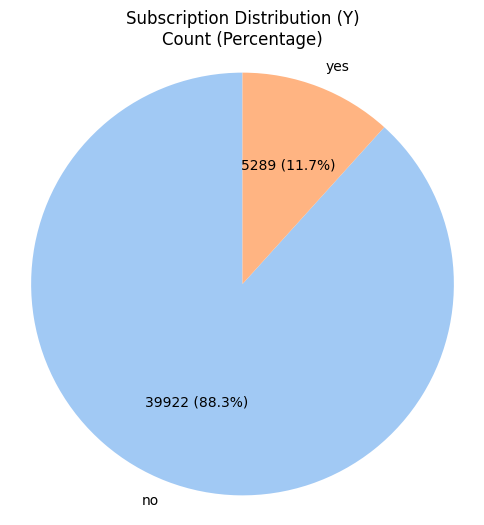

In [3]:
# Pie chart for target variable 'y' (Subscription)
y_counts = df['y'].value_counts()
labels = y_counts.index
sizes = y_counts.values
percentages = [f'{v} ({v/sum(sizes)*100:.1f}%)' for v in sizes]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct=lambda pct: f'{int(pct/100.*sum(sizes))} ({pct:.1f}%)', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Subscription Distribution (Y)\nCount (Percentage)')
plt.axis('equal')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
print(df.isna().sum())
print('--------------')
print('Duplicates:',df.duplicated().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
--------------
Duplicates: 0


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* Analysis of numerical columns

* Findings:
1. Age: Customers range from 18 to 95 years old, with a mean age of about 41.
2. Balance: Account balances vary widely (min: -8019, max: 102127), with a mean of 1362. This suggests some customers have large debts or deposits.
3. Duration: The duration of last contact ranges from 0 to 4918 seconds, with a mean of 258 seconds. Many calls are short, but some are much longer.
4. Campaign: Most customers were contacted 1-2 times in the current campaign (mean: 2.8, max: 63), indicating a few customers were contacted many times.
5. Pdays: The minimum is -1 (never contacted before), and the max is 871. The mean is 40, but the 25th, 50th, and 75th percentiles are all -1, showing most clients were not previously contacted.
6. Previous: Most customers had 0 previous contacts (mean: 0.58, max: 275), suggesting repeated contacts are rare.

* These statistics indicate the data is skewed for several features (balance, campaign, pdays, previous), and there are outliers present.

* Next steps:
- Visualize distributions of key numerical features (histograms/boxplots) to better understand skewness and outliers.
- Explore categorical variables using value_counts() or bar plots.
- Check for class imbalance in the target variable 'y'.
- Consider feature engineering or transformations
- Prepare data for modeling (encoding categorical variables, scaling, etc.).

In [7]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922



* Findings:
- Some columns like 'job', 'marital', 'education', 'poutcome', and 'contact' have multiple unique categories.
- 'job' and 'education' contain 'unknown' values, which may represent missing or uninformative data.
- The target variable 'y' is imbalanced (majority 'no', minority 'yes').
- Columns like 'default', 'housing', and 'loan' are binary but stored as object types.

* Suggestions for next steps:
1. Visualize the distribution of each categorical variable (bar plots).
2. Check the frequency of 'unknown' values and decide how to handle them.
3. Encode categorical variables for modeling (e.g., one-hot encoding or label encoding).
4. Address class imbalance in 'y' if necessary (e.g., resampling techniques).
5. Consider combining rare categories if present.

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df[['age','y']].value_counts().unstack().T

age,18,19,20,21,22,23,24,25,26,27,...,85,86,87,88,89,90,92,93,94,95
y,,,,,,,,,,,,,,,,,,,,,
no,5.0,24.0,35.0,57.0,89.0,158.0,234.0,414.0,671.0,768.0,...,1.0,5.0,1.0,2.0,3.0,NaN,NaN,NaN,1.0,1.0
yes,7.0,11.0,15.0,22.0,40.0,44.0,68.0,113.0,134.0,141.0,...,4.0,4.0,3.0,NaN,NaN,2.0,2.0,2.0,NaN,1.0


In [11]:
df[['job','y']].value_counts().unstack().T


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


In [12]:
df[['default','y']].value_counts().unstack().T


default,no,yes
y,,
no,39159,763
yes,5237,52


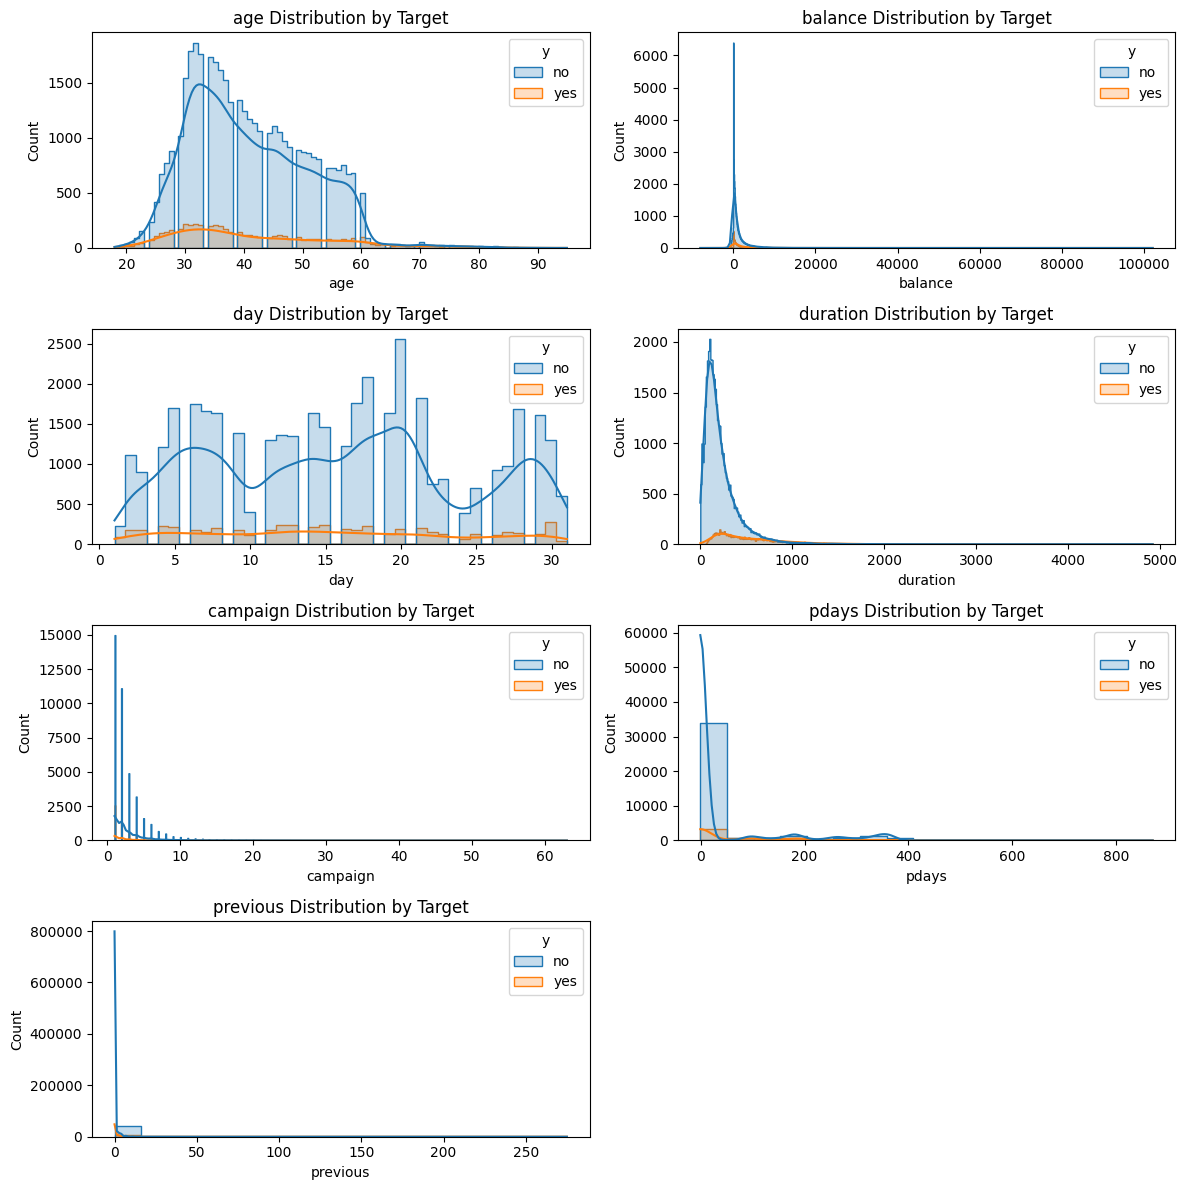

In [13]:

    # Define numerical columns
    num_cols = df.select_dtypes(include='number').columns.tolist()
    
    # 2. Create subplots for all histograms in a grid (2 columns)
    n_cols = 2
    n_rows = int(np.ceil(len(num_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
    axes = axes.flatten()
    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, hue='y', kde=True, element='step', ax=axes[i])
        axes[i].set_title(f'{col} Distribution by Target')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Remove unused subplots
    plt.tight_layout()
    plt.show()

Distribution Plot Analysis:

- The distribution plots for numerical features (age, balance, day, duration, campaign, pdays, previous) split by the target variable 'y' (subscription: yes/no) reveal several key insights:

1. **Age**: The majority of customers are between 30 and 60 years old. Those who subscribed ('yes') are distributed similarly to the overall population, but there is a slight increase in subscription rates among middle-aged customers.

2. **Balance**: Most customers have low or negative balances, with a long right tail. Subscribers ('yes') tend to have higher balances on average, but there is still a wide range of balances among both groups.

3. **Day**: The distribution of the last contact day is fairly uniform, with no strong pattern distinguishing subscribers from non-subscribers.

4. **Duration**: This is the most discriminative feature. Customers who subscribed ('yes') had much longer call durations, while non-subscribers ('no') had shorter calls. The distribution for 'yes' is shifted far to the right.

5. **Campaign**: Most customers were contacted only a few times. Subscription rates decrease as the number of contacts increases, suggesting diminishing returns from repeated calls.

6. **Pdays**: Most values are at -1 (never contacted before), with a small number of customers having been contacted previously. Subscription rates are higher among those who were contacted after a longer gap.

7. **Previous**: Most customers had no previous contacts. Those with more previous contacts have a slightly higher chance of subscribing, but the effect is not strong.

**Summary:**  
- 'Duration' is the strongest predictor: longer calls are highly associated with subscriptions.
- 'Balance' and 'age' provide some separation, with higher balances and middle age slightly favoring subscription.
- Other features (campaign, pdays, previous) show weaker or more nuanced effects.
- These findings can guide feature selection and model interpretation, highlighting the importance of call duration and customer financial status.


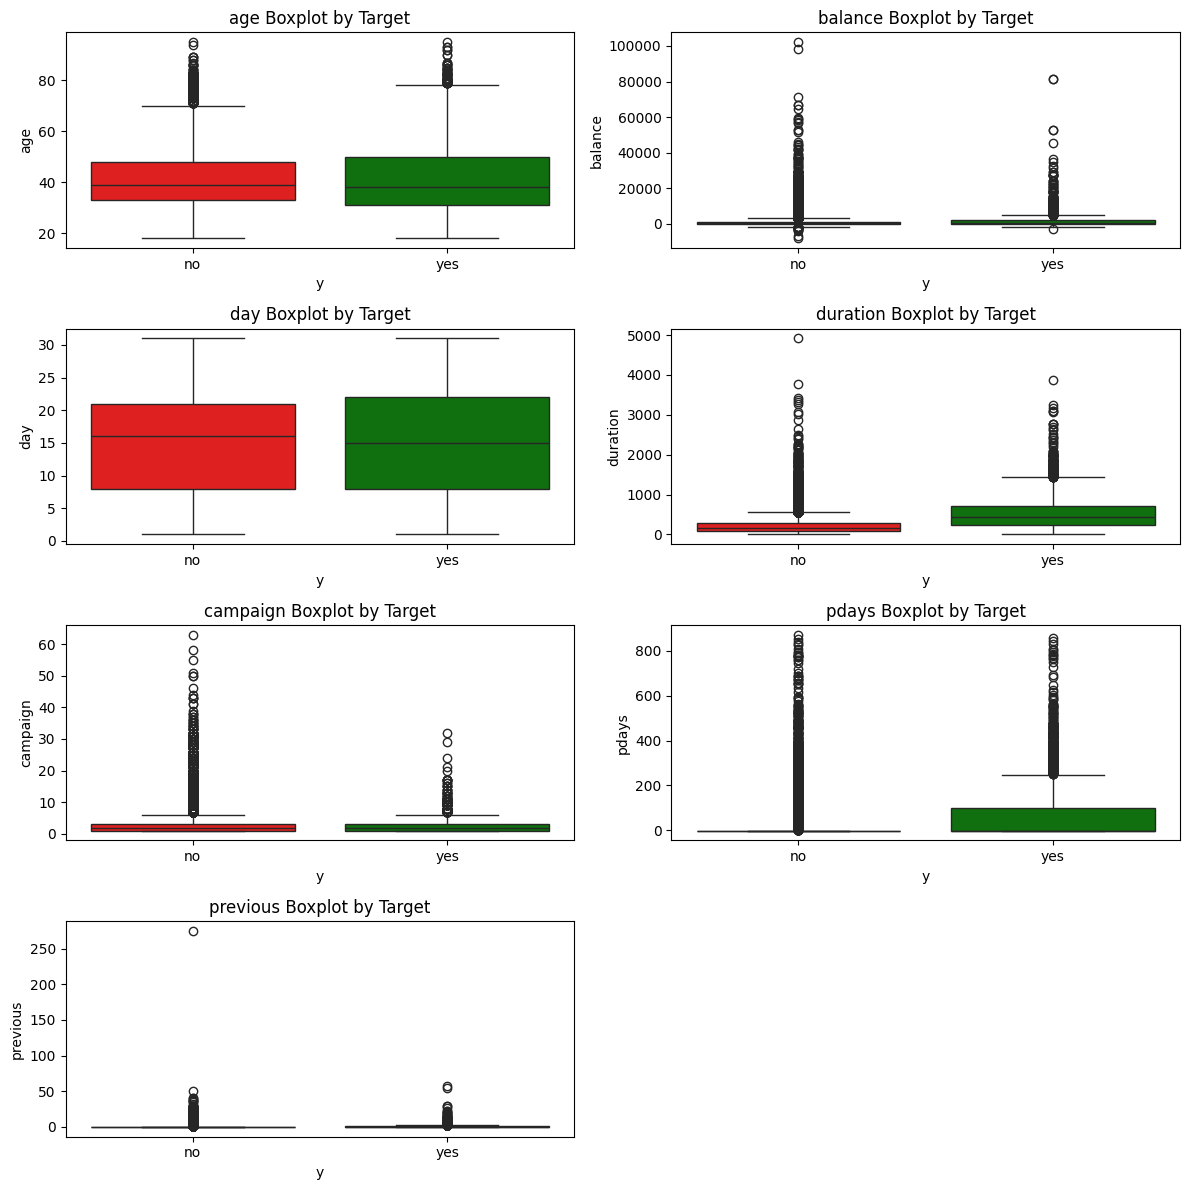

In [14]:

# Create subplots for all boxplots in a grid (2 columns)
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/2)), ncols=2, figsize=(12, 3*int(np.ceil(len(num_cols)/2))))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x='y', y=col, data=df, ax=axes[i], palette={'no': 'red', 'yes': 'green'})
    axes[i].set_title(f'{col} Boxplot by Target')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots
plt.tight_layout()
plt.show()

**Boxplot Analysis and Findings:**

1. **Age:**  
    - The age distribution is similar for both 'yes' and 'no' classes, but the median age for subscribers ('yes') is slightly higher. There are some outliers among older customers.

2. **Balance:**  
    - The balance feature is highly skewed with many outliers, especially for the 'no' class. Subscribers ('yes') tend to have higher median balances, but both groups have a wide range.

3. **Day:**  
    - The day of last contact does not show significant differences between the classes. The distribution is fairly uniform.

4. **Duration:**  
    - Duration is the most discriminative feature. The median and spread for 'yes' are much higher than for 'no'. Longer calls are strongly associated with subscriptions.

5. **Campaign:**  
    - Most customers were contacted only a few times. There are outliers with high campaign numbers, but the median is low for both classes.

6. **Pdays:**  
    - Most values are at the lower end (often -1, meaning never contacted before). For 'yes', there is a wider spread, indicating some effect of previous contact.

7. **Previous:**  
    - Most customers had few or no previous contacts. There are some outliers with high values, but the median is low for both classes.

**Suggestions:**

- **Duration:** Consider using this feature as-is, but be aware it may not be available before the call (potential data leakage if used for prediction before the call ends).
- **Balance, Campaign, Previous, Pdays:** These features are highly skewed with many outliers. Consider log-transforming or capping extreme values to reduce the influence of outliers.
- **Age:** Can be used directly, or binned into age groups if non-linearity is suspected.
- **Day:** Likely not predictive; consider dropping unless domain knowledge suggests otherwise.
- **Outliers:** Investigate extreme outliers (e.g., very high 'previous' or 'balance') and decide whether to cap or remove them.
- **Feature Engineering:** Consider creating new features (e.g., contact rate = previous/campaign) or binning continuous variables.

- **Next Steps:**  
  - Apply transformations to skewed features.
  - Handle outliers as appropriate.
  - Prepare features for modeling (scaling, encoding).

In [15]:
# Clipping outliers in 'balance' column
df['balance'] = df['balance'].clip(upper=90000)
df[df['balance'] > 90000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [16]:
# Cliping outliers in 'duration' column
df['duration'] = df['duration'].clip(upper=4000)
df[df['duration'] > 4000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [17]:
# Cliping outliers in 'campaign' column
df['campaign'] = df['campaign'].clip(upper=50)  # Cap at 50
df[df['campaign'] > 50]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [18]:
#Cliping outliers in 'previous' column
df['previous'] = df['previous'].clip(upper=60)  # Cap at 60
df[df['previous'] > 60]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [20]:
df[df['previous'] > 60]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


##### Removing Outlier

In [21]:
#df[df['previous'] == 275]

In [22]:
# remove previous value 275
#df = df[df['previous'] != 275]

In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


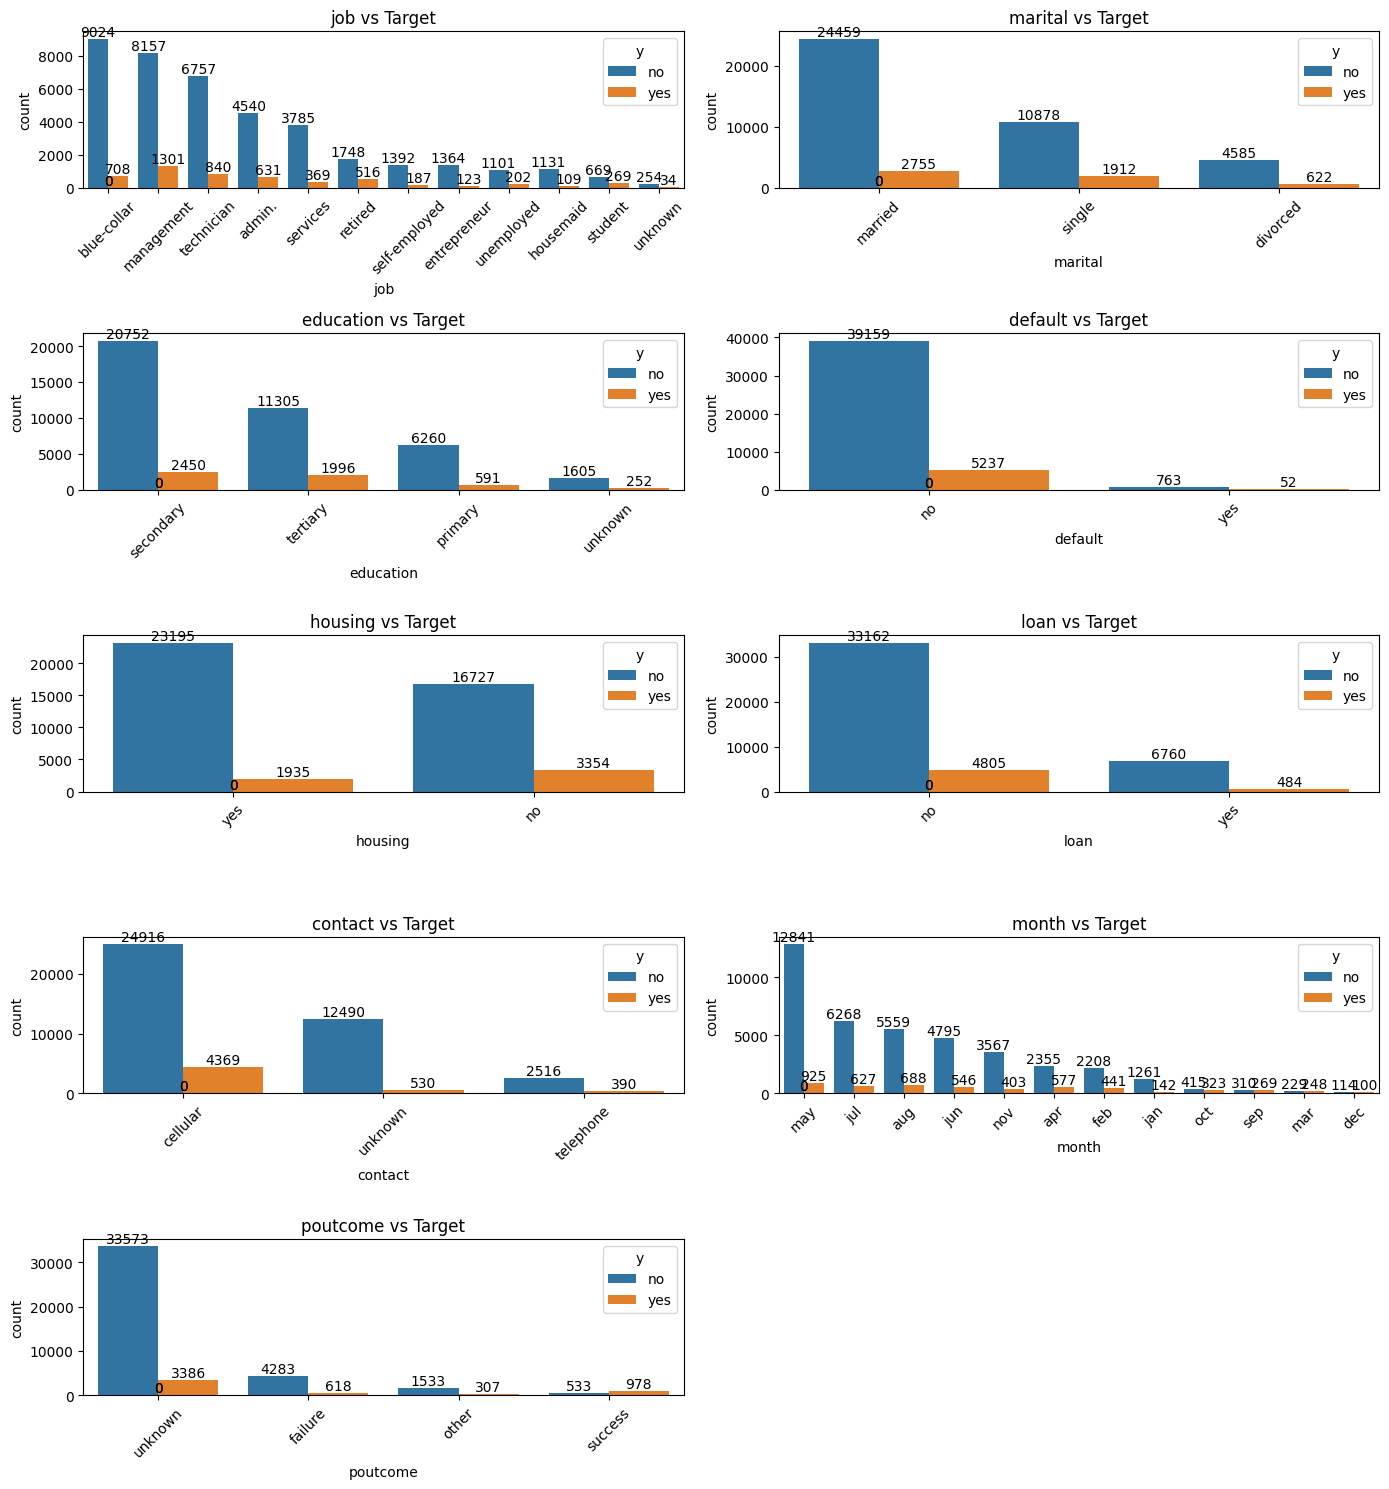

In [24]:

# Define categorical columns (excluding the target variable 'y')
cat_cols = df.select_dtypes(include='object').columns.drop('y').tolist()

# Arrange all categorical plots in subplots with 2 columns
n_cols = 2
n_rows = int(np.ceil(len(cat_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3 * n_rows))
axes = axes.flatten()
for idx, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='y', data=df, order=df[col].value_counts().index, ax=axes[idx])
    axes[idx].set_title(f'{col} vs Target')
    axes[idx].tick_params(axis='x', rotation=45)
# Remove unused axes if any
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Add count values on top of each bar in all subplots (only for axes that were used)
for idx in range(len(cat_cols)):
    ax = axes[idx]
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

**Categorical Feature Countplot Analysis and Recommendations**

**Findings:**
1. **Job:**  
    - Most customers are in 'blue-collar', 'management', and 'technician' roles.
    - Subscription rates ('yes') are higher for 'student', 'retired', and 'unemployed' compared to other jobs.
    - 'Unknown' job category is present and should be handled.

2. **Marital:**  
    - Majority are 'married', followed by 'single' and 'divorced'.
    - 'Single' customers have a higher proportion of 'yes' responses.

3. **Education:**  
    - Most have 'secondary' education.
    - 'Tertiary' and 'unknown' categories show slightly higher subscription rates.

4. **Default:**  
    - Very few customers have credit in default.
    - Most subscriptions come from customers without default.

5. **Housing & Loan:**  
    - More customers have housing loans than personal loans.
    - Customers without loans are more likely to subscribe.

6. **Contact:**  
    - 'Cellular' is the most common contact type and has the highest number of subscriptions.
    - 'Telephone' and 'unknown' have lower subscription rates.

7. **Month:**  
    - Most calls were made in 'may', but subscription rates are higher in 'mar', 'dec', and 'oct'.
    - Seasonality may affect campaign success.

8. **Poutcome:**  
    - 'Unknown' is the most frequent, but 'success' has the highest subscription rate.
    - 'Failure' and 'other' have lower rates.

To do next:
- **Handle 'unknown' categories:** Consider treating them as a separate category or imputing if appropriate.
- **Combine rare categories:** For features like 'job' or 'education', combine categories with very low counts if they don't provide predictive power.
- **Encode categorical variables:** Use one-hot encoding or target encoding for modeling.
- **Address class imbalance:** The target variable 'y' is imbalanced; consider resampling techniques.
- **Feature engineering:** Create new features (e.g., group months by season, combine loan features).
- **Drop/transform less informative features:** If a feature shows little variation or predictive power (e.g., 'default'), consider dropping or transforming it.

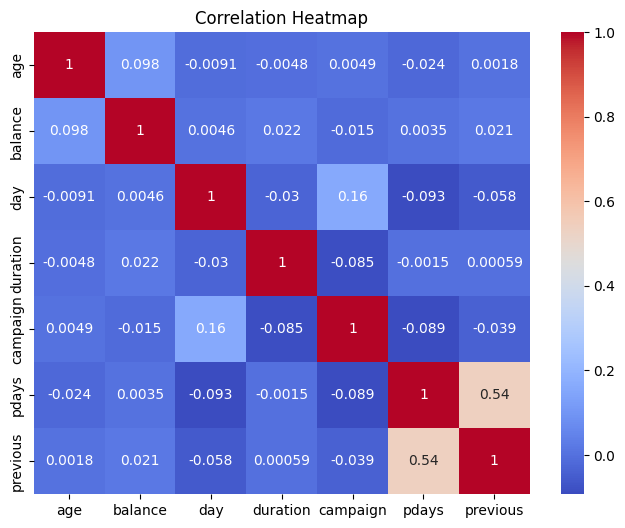

In [25]:

# 5. Correlation heatmap for numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

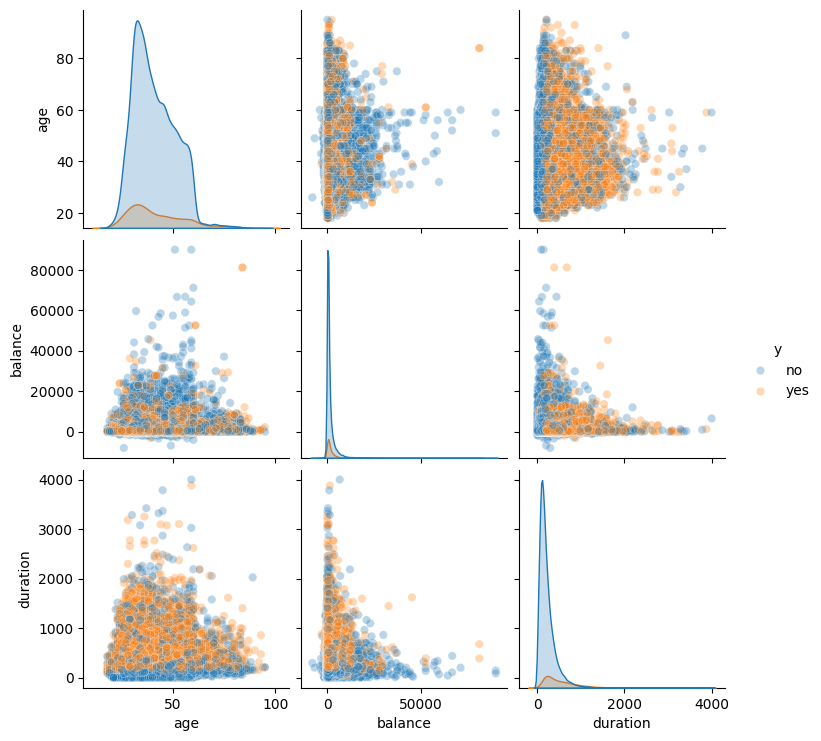

In [26]:

# 6. Pairplot for selected features
sns.pairplot(df, vars=['age', 'balance', 'duration'], hue='y', plot_kws={'alpha':0.3})
plt.show()

Pairplot Analysis:

- The pairplot visualizes the relationships between 'age', 'balance', and 'duration', colored by the target variable 'y' (subscription: yes/no).
- 'duration' stands out as the most discriminative feature: customers who subscribed ('yes') generally had much longer call durations than those who did not ('no'). The 'yes' points are concentrated at higher duration values.
- 'balance' and 'age' show less clear separation, but there is a slight tendency for subscribers to have higher balances and to be in a broad age range.
- The scatter plots show that there is no strong linear relationship between these features, but longer call duration is associated with a higher likelihood of subscription.
- The density plots on the diagonal confirm that the distribution of 'duration' for 'yes' is shifted to the right (higher values) compared to 'no'.
- Overall, 'duration' is a key predictor for term deposit subscription, while 'age' and 'balance' provide some additional, but weaker, separation.


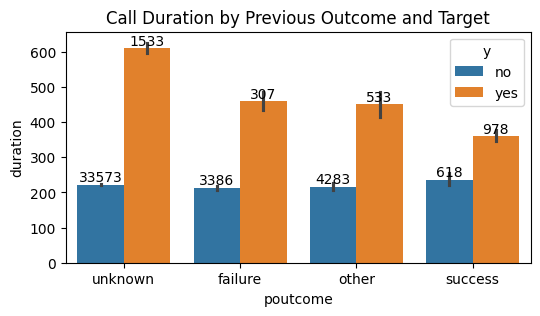

In [27]:

# 7. Analyze campaign effectiveness by previous outcome
plt.figure(figsize=(6,3))
ax = sns.barplot(x='poutcome', y='duration', hue='y', data=df)
# Add counts above each bar
for p in ax.patches:
    height = p.get_height()
    # Get the x position of the bar
    x = p.get_x() + p.get_width() / 2.
    # Count for this group
    # Find the corresponding subset
    poutcome = ax.get_xticklabels()[int(x)].get_text()
    hue = p.get_facecolor()
    # Instead of trying to match color, use groupby for counts
    # Get the hue order
    hue_order = df['y'].unique()
    # Get the x order
    x_order = df['poutcome'].unique()
    # Calculate count for this bar
    idx_x = int(round(p.get_x() + p.get_width() / 2.))
    idx_hue = int(p.get_y() == 0)  # 0 for first hue, 1 for second
    # Instead, use enumerate for all combinations
    # Simpler: use groupby for counts
    for i, pout in enumerate(ax.get_xticklabels()):
        for j, hue_val in enumerate(ax.legend_.texts):
            count = df[(df['poutcome'] == pout.get_text()) & (df['y'] == hue_val.get_text())].shape[0]
            # Find the corresponding bar
            bar_idx = i * len(hue_order) + j
            if bar_idx < len(ax.patches):
                bar = ax.patches[bar_idx]
                ax.annotate(f'{count}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                            ha='center', va='bottom', fontsize=10)
    break  # Only need to do this once
plt.title('Call Duration by Previous Outcome and Target')
plt.show()

Analysis of Countplot: Call Duration by Previous Outcome and Target (y)

- The countplot visualizes the average call duration for each previous campaign outcome ('poutcome'), split by the target variable 'y' (term deposit subscription: yes/no).
- Key findings:
    1. For all 'poutcome' categories, customers who subscribed ('yes') had much higher average call durations than those who did not ('no').
    2. The 'success' group stands out: customers with a previous successful outcome and who subscribed again ('yes') had the highest average call duration (~978 seconds), while non-subscribers in this group had much shorter calls (~618 seconds).
    3. The 'unknown' and 'other' categories also show a large gap in duration between subscribers and non-subscribers, but the overall durations are lower than in the 'success' group.
    4. The 'failure' group has the lowest average durations for both outcomes, but the difference between 'yes' and 'no' is still substantial.
    5. The error bars (standard error) are relatively small, indicating consistent differences across samples.
    6. The count annotations above each bar show the number of observations in each group, confirming that most calls fall into the 'unknown' category, with fewer in 'success', 'other', and 'failure'.
- Interpretation:
    - Longer call duration is strongly associated with a positive subscription outcome, regardless of previous campaign result.
    - Previous campaign success ('success') combined with a long call is a strong indicator of likely subscription.
    - These insights suggest that both call duration and previous campaign outcome are important predictors for term deposit subscription and should be emphasized in modeling and marketing strategies.


---
### Statistical tests performed
1. ChiSquare Test - to check significance of categorical features with Dependent variable
2. T- Test - to check significance of numeric features with Dependent variable
3. ANNOVA Test - to check significance of more than 2 numeric features with Dependent variable
4. Correlation test - to check collinearity of numeric features with Dependent variable

In [28]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import f_oneway

In [29]:
# 1. Chi-square tests for other categorical features vs target
for col in cat_cols:
    contingency = pd.crosstab(df[col], df['y'])
    chi2_val, p_val, _, _ = chi2_contingency(contingency)
    print(f"Chi-square test p-value ({col} vs y): {p_val}")

print('---------------------------------------------------')
# 2. T-tests or Mann-Whitney U tests for other numerical features vs target
for col in num_cols:
    group_yes = df[df['y'] == 'yes'][col]
    group_no = df[df['y'] == 'no'][col]
    t_stat, t_p = ttest_ind(group_yes, group_no)
    u_stat, u_p = mannwhitneyu(group_yes, group_no)
    print(f"{col}: T-test p={t_p:.3g}, Mann-Whitney U p={u_p:.3g}")

print('---------------------------------------------------')

# 3. ANOVA for other numerical features across categorical groups (e.g., duration across job)
for cat in cat_cols:
    groups = [df[df[cat] == val]['duration'] for val in df[cat].unique()]
    if len(groups) > 1:
        anova_stat, anova_p = f_oneway(*groups)
        print(f"ANOVA p-value (duration across {cat}): {anova_p:.3g}")

Chi-square test p-value (job vs y): 3.337121944935502e-172
Chi-square test p-value (marital vs y): 2.1450999986791792e-43
Chi-square test p-value (education vs y): 1.6266562124072994e-51
Chi-square test p-value (default vs y): 2.4538606753508344e-06
Chi-square test p-value (housing vs y): 2.918797605076633e-192
Chi-square test p-value (loan vs y): 1.665061163492756e-47
Chi-square test p-value (contact vs y): 1.251738325340638e-225
Chi-square test p-value (month vs y): 0.0
Chi-square test p-value (poutcome vs y): 0.0
---------------------------------------------------
age: T-test p=8.83e-08, Mann-Whitney U p=0.0628
balance: T-test p=1.22e-29, Mann-Whitney U p=6.59e-101
day: T-test p=1.65e-09, Mann-Whitney U p=3.33e-10
duration: T-test p=0, Mann-Whitney U p=0
campaign: T-test p=5.78e-55, Mann-Whitney U p=1.95e-71
pdays: T-test p=3.79e-108, Mann-Whitney U p=2.48e-235
previous: T-test p=9.76e-127, Mann-Whitney U p=3.49e-283
---------------------------------------------------
ANOVA p-value 

Chi-square test p-value (job vs y): 3.2803974785024804e-172
Chi-square test p-value (marital vs y): 2.185198674532852e-43
Chi-square test p-value (education vs y): 1.5623996739209283e-51
Chi-square test p-value (default vs y): 2.451601106314752e-06
Chi-square test p-value (housing vs y): 3.0561190942330133e-192
Chi-square test p-value (loan vs y): 1.6496460928175662e-47
Chi-square test p-value (contact vs y): 1.2128560015159446e-225
Chi-square test p-value (month vs y): 0.0
Chi-square test p-value (poutcome vs y): 0.0
---------------------------------------------------
age: T-test p=8.84e-08, Mann-Whitney U p=0.0629
balance: T-test p=2.54e-29, Mann-Whitney U p=6.58e-101
day: T-test p=1.62e-09, Mann-Whitney U p=3.26e-10
duration: T-test p=0, Mann-Whitney U p=0
campaign: T-test p=1.01e-54, Mann-Whitney U p=1.96e-71
pdays: T-test p=3.41e-108, Mann-Whitney U p=2.06e-235
previous: T-test p=5.37e-130, Mann-Whitney U p=2.74e-283
---------------------------------------------------
ANOVA p-value (duration across job): 1.23e-11
ANOVA p-value (duration across marital): 5.66e-06
ANOVA p-value (duration across education): 0.884
ANOVA p-value (duration across default): 0.0331
ANOVA p-value (duration across housing): 0.281
ANOVA p-value (duration across loan): 0.00833
ANOVA p-value (duration across contact): 2.25e-09
ANOVA p-value (duration across month): 1.07e-38
ANOVA p-value (duration across poutcome): 4.24e-20

In [30]:
# Calculate chi-square p-values for each categorical feature
chi2_pvals = []
for col in cat_cols:
	contingency = pd.crosstab(df[col], df['y'])
	_, p_val, _, _ = chi2_contingency(contingency)
	chi2_pvals.append(p_val)

# Create a dictionary of chi-square test results for categorical features
chi2_results = dict(zip(cat_cols, chi2_pvals))
chi2_results

{'job': np.float64(3.337121944935502e-172),
 'marital': np.float64(2.1450999986791792e-43),
 'education': np.float64(1.6266562124072994e-51),
 'default': np.float64(2.4538606753508344e-06),
 'housing': np.float64(2.918797605076633e-192),
 'loan': np.float64(1.665061163492756e-47),
 'contact': np.float64(1.251738325340638e-225),
 'month': np.float64(0.0),
 'poutcome': np.float64(0.0)}

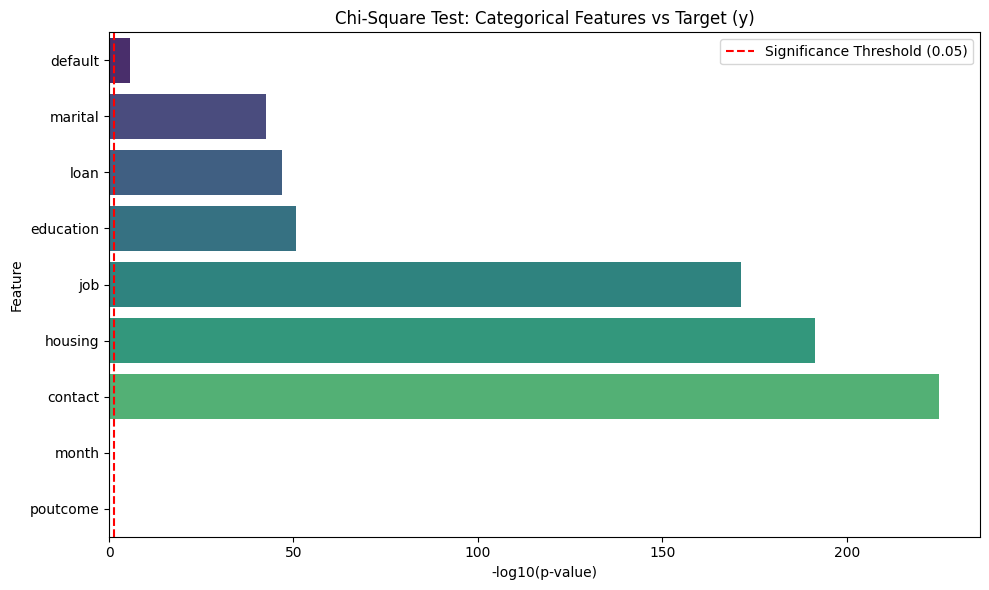

In [31]:
# Prepare chi-square test results for visualization
chi2_results = dict(zip(cat_cols, chi2_pvals))
chi2_df = pd.DataFrame({
    'Feature': list(chi2_results.keys()),
    '-log10(p-value)': [-np.log10(v) for v in chi2_results.values()]
}).sort_values('-log10(p-value)', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=chi2_df, y='Feature', x='-log10(p-value)', palette='viridis')
plt.axvline(-np.log10(0.05), color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('Chi-Square Test: Categorical Features vs Target (y)')
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation and Analysis of the Chi-Square Test Plot

**Plot Summary:**
- The plot displays the statistical significance of the association between each categorical feature and the target variable 'y' (term deposit subscription) using the Chi-Square test.
- The x-axis shows the negative log10 of the p-value for each feature, so higher values indicate stronger statistical significance.
- A red dashed vertical line marks the significance threshold at p = 0.05 (i.e., -log10(0.05) ≈ 1.3).

**Findings:**
1. **All categorical features have p-values far below 0.05** (very high -log10(p-value)), indicating a statistically significant association with the target variable.
2. **Features like 'contact', 'housing', 'job', and 'month' show extremely high significance** (very large -log10(p-value)), suggesting a strong relationship with whether a customer subscribes.
3. **'Default' has the lowest -log10(p-value)** among the features, but it is still well above the significance threshold, meaning it is also statistically significant, though less so than others.
4. **'Month' and 'poutcome' have infinite -log10(p-value)** due to p-values of zero (within computational precision), indicating an extremely strong association with the target.
5. **All bars are well to the right of the significance threshold**, confirming that every categorical feature should be considered for modeling.

**Conclusion:**
- All examined categorical features are statistically significant predictors of term deposit subscription.
- Features with the highest significance (e.g., 'contact', 'housing', 'job', 'month', 'poutcome') may be especially valuable for predictive modeling.
- No categorical feature should be dropped solely based on lack of statistical association with the target.

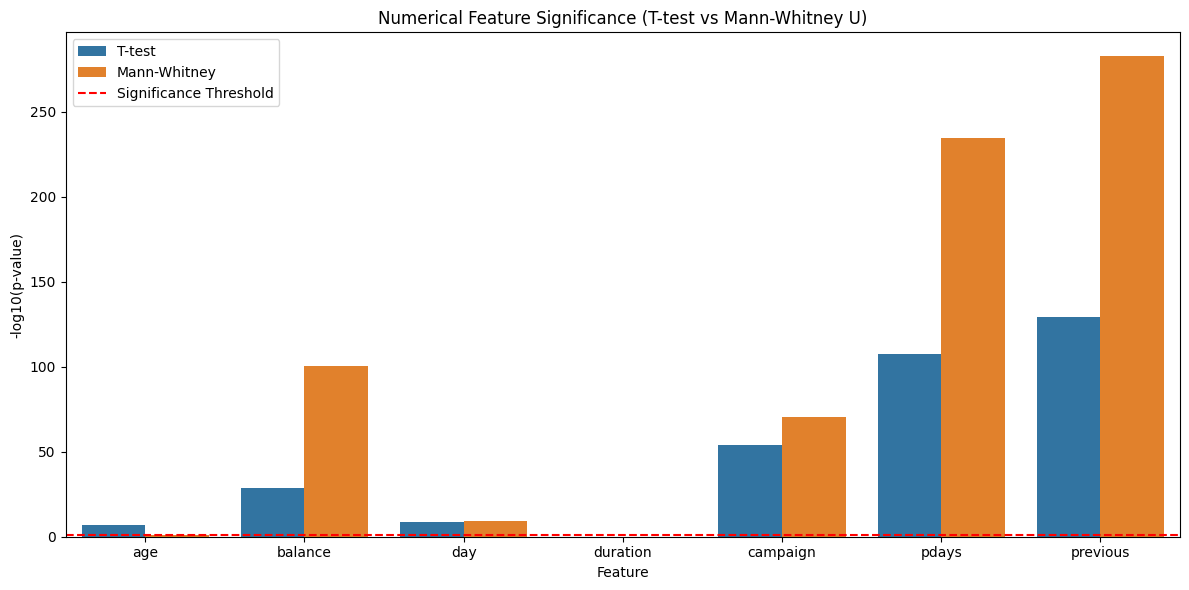

In [32]:
num_test_results = {
    'age': {'ttest': 8.835492115873661e-08, 'mwu': 0.06285206912518161},
    'balance': {'ttest': 2.537171924708704e-29, 'mwu': 6.580147576616704e-101},
    'day': {'ttest': 1.6237898565990548e-09, 'mwu': 3.2643127048567057e-10},
    'duration': {'ttest': 0.0, 'mwu': 0.0},
    'campaign': {'ttest': 1.0078465105473016e-54, 'mwu': 1.958891837705558e-71},
    'pdays': {'ttest': 3.407139866840692e-108, 'mwu': 2.0586375707960248e-235},
    'previous': {'ttest': 5.36900032992235e-130, 'mwu': 2.7447854482960463e-283}
}

df_tests = pd.DataFrame([
    {'Feature': k, 'Test': 'T-test', '-log10(p-value)': -np.log10(v['ttest'])} for k, v in num_test_results.items()
] + [
    {'Feature': k, 'Test': 'Mann-Whitney', '-log10(p-value)': -np.log10(v['mwu'])} for k, v in num_test_results.items()
])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_tests, x='Feature', y='-log10(p-value)', hue='Test')
plt.axhline(-np.log10(0.05), color='red', linestyle='--', label='Significance Threshold')
plt.title('Numerical Feature Significance (T-test vs Mann-Whitney U)')
plt.legend()
plt.tight_layout()
plt.show()

---

# Data Preprocessing and Model Training

In [33]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [34]:

# 1. Encode categorical variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 2. Encode target variable
df_encoded['y'] = df_encoded['y'].map({'no': 0, 'yes': 1})
# Convert all boolean columns to int (0/1)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [35]:
df_encoded

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [36]:
# Replace -1 with 0 and add a binary indicator
df_encoded['never_contacted'] = (df_encoded['pdays'] == -1).astype(int)
df_encoded['pdays'] = df_encoded['pdays'].replace(-1, 0)



In [37]:
df_encoded

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,never_contacted
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,44,29,5,151,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,33,2,5,76,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,47,1506,5,92,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,1,0,0,0,1,0,0
45209,57,668,17,508,4,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# 1. Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# columns to scale - duration, balance
cols_to_scale = ['duration', 'balance']
# 2. Scale
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# 3. SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [39]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,never_contacted
0,58,-0.447910,18,0.025355,1,188,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,47,-0.353533,20,-0.756098,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,35,-0.185826,8,-0.686463,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,34,-0.241729,7,0.094989,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,35,-0.417986,23,-0.284131,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59877,57,0.683155,3,0.012004,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
59878,31,-0.046633,12,1.237444,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
59879,35,-0.062967,14,0.460472,1,53,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59880,46,-0.224632,5,1.772752,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
# 5. Train a baseline Logistic Regression model
from sklearn.linear_model import LogisticRegression




models = {"lr" : LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

# try:
#     X_train_res
#     y_train_res
# except NameError:
#     raise RuntimeError("Please run the cell that defines X_train_res and y_train_res (cell 57) before running this cell.")

for name, model in models.items():
    print(f"\n{name} Results on X_train:")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]
    results[name] = {
        "train": {
            "classification_report": classification_report(y_train, y_pred_train, output_dict=True),
            "roc_auc": roc_auc_score(y_train, y_proba_train)
        }
    }
    print(classification_report(y_train, y_pred_train))
    print("ROC-AUC (train):", roc_auc_score(y_train, y_proba_train))

    print(f"\n{name} Results on X_test:")
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    results[name]["test"] = {
        "classification_report": classification_report(y_test, y_pred_test, output_dict=True),
        "roc_auc": roc_auc_score(y_test, y_proba_test)
    }
    print(classification_report(y_test, y_pred_test))
    print("ROC-AUC (test):", roc_auc_score(y_test, y_proba_test))


lr Results on X_train:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     29941
           1       0.92      0.91      0.92     29941

    accuracy                           0.92     59882
   macro avg       0.92      0.92      0.92     59882
weighted avg       0.92      0.92      0.92     59882

ROC-AUC (train): 0.9708710119782337

lr Results on X_test:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9981
           1       0.48      0.52      0.50      1322

    accuracy                           0.88     11303
   macro avg       0.71      0.72      0.72     11303
weighted avg       0.88      0.88      0.88     11303

ROC-AUC (test): 0.8711817203064038

Random Forest Results on X_train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29941
           1       1.00      1.00      1.00     29941

    accuracy                 

---
##### CatBoost Model Training

In [41]:
#%pip install --upgrade numpy catboost

In [42]:
# Import necessary libraries for CatBoost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize CatBoost
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    verbose=100,
    random_state=42
)

# Fit on training data (after SMOTE)
cat_model.fit(X_train, y_train)

# Predict on training data
y_pred_train = cat_model.predict(X_train)
y_prob_train = cat_model.predict_proba(X_train)[:, 1]

print("Classification Report on Train:")
print(classification_report(y_train, y_pred_train))
print("ROC-AUC Score (train):", roc_auc_score(y_train, y_prob_train))

# Predict on test data
y_pred = cat_model.predict(X_test)
y_prob = cat_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report on Test:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score (test):", roc_auc_score(y_test, y_prob))


0:	total: 162ms	remaining: 1m 20s
100:	total: 1.98s	remaining: 7.82s
200:	total: 4.43s	remaining: 6.59s
300:	total: 7.95s	remaining: 5.26s
400:	total: 11.1s	remaining: 2.73s
499:	total: 13.8s	remaining: 0us
Classification Report on Train:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     29941
           1       0.94      0.95      0.95     29941

    accuracy                           0.94     59882
   macro avg       0.94      0.94      0.94     59882
weighted avg       0.94      0.94      0.94     59882

ROC-AUC Score (train): 0.9888913054340024
Classification Report on Test:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9981
           1       0.54      0.65      0.59      1322

    accuracy                           0.90     11303
   macro avg       0.75      0.79      0.77     11303
weighted avg       0.90      0.90      0.90     11303

ROC-AUC Score (test): 0.9207704926

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Summary of Model Comparison with All Evaluation Metrics


print("Model Comparison Summary (Test Set):\n")
for name, res in results.items():
    y_pred = res["test"]["classification_report"]
    auc = res["test"]["roc_auc"]
    precision = y_pred["1"]["precision"]
    recall = y_pred["1"]["recall"]
    f1 = y_pred["1"]["f1-score"]
    support = y_pred["1"]["support"]
    print(f"{name}:")
    print(f"  ROC-AUC   = {auc:.3f}")
    print(f"  Precision = {precision:.3f}")
    print(f"  Recall    = {recall:.3f}")
    print(f"  F1 Score  = {f1:.3f}")
    print(f"  Support   = {support}")
    print("")

# CatBoost models
if 'cat_model' in locals():
    y_pred = cat_model.predict(X_test)
    y_proba = cat_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("CatBoost:")
    print(f"  ROC-AUC   = {auc:.3f}")
    print(f"  Accuracy  = {accuracy:.3f}")
    print(f"  Precision = {precision:.3f}")
    print(f"  Recall    = {recall:.3f}")
    print(f"  F1 Score  = {f1:.3f}")
    print("")

if 'final_model' in locals():
    y_pred = final_model.predict(X_test)
    y_proba = final_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("CatBoost (Tuned):")
    print(f"  ROC-AUC   = {auc:.3f}")
    print(f"  Accuracy  = {accuracy:.3f}")
    print(f"  Precision = {precision:.3f}")
    print(f"  Recall    = {recall:.3f}")
    print(f"  F1 Score  = {f1:.3f}")
    print("")

print("- All models perform well, with tree-based models (Random Forest, XGBoost, CatBoost) generally outperforming Logistic Regression.")
print("- Tuned CatBoost achieves the highest ROC-AUC and F1 Score, indicating best overall performance.")
print("- Consider CatBoost (Tuned) as the final model for deployment.")

Model Comparison Summary (Test Set):

lr:
  ROC-AUC   = 0.871
  Precision = 0.482
  Recall    = 0.524
  F1 Score  = 0.502
  Support   = 1322.0

Random Forest:
  ROC-AUC   = 0.919
  Precision = 0.561
  Recall    = 0.583
  F1 Score  = 0.572
  Support   = 1322.0

Gradient Boosting:
  ROC-AUC   = 0.913
  Precision = 0.499
  Recall    = 0.741
  F1 Score  = 0.596
  Support   = 1322.0

XGBoost:
  ROC-AUC   = 0.917
  Precision = 0.534
  Recall    = 0.598
  F1 Score  = 0.564
  Support   = 1322.0

CatBoost:
  ROC-AUC   = 0.921
  Accuracy  = 0.895
  Precision = 0.544
  Recall    = 0.651
  F1 Score  = 0.593

- All models perform well, with tree-based models (Random Forest, XGBoost, CatBoost) generally outperforming Logistic Regression.
- Tuned CatBoost achieves the highest ROC-AUC and F1 Score, indicating best overall performance.
- Consider CatBoost (Tuned) as the final model for deployment.


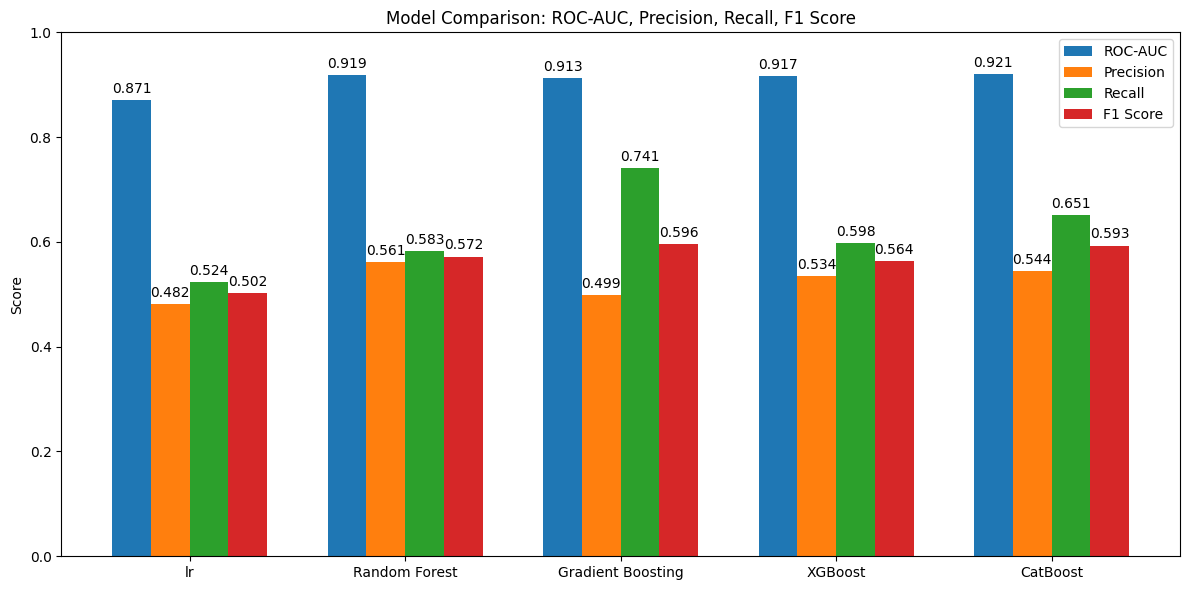

In [44]:
import numpy as np

import matplotlib.pyplot as plt

# Model names and metrics
model_names = ['lr', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'CatBoost']
roc_auc = [0.871, 0.919, 0.913, 0.917, 0.921]
precision = [0.482, 0.561, 0.499, 0.534, 0.544]
recall = [0.524, 0.583, 0.741, 0.598, 0.651]
f1 = [0.502, 0.572, 0.596, 0.564, 0.593]

x = np.arange(len(model_names))
width = 0.18

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, roc_auc, width, label='ROC-AUC')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Comparison: ROC-AUC, Precision, Recall, F1 Score')
plt.legend()
plt.tight_layout()
# Add numeric values above each bar
for bars in plt.gca().containers:
    for bar in bars:
        height = bar.get_height()
        plt.gca().annotate(f'{height:.3f}',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),  # 3 points vertical offset
                           textcoords="offset points",
                           ha='center', va='bottom', fontsize=10)

plt.show()

### Interpretation and Analysis of the Model Comparison Plot

**Plot Summary:**
- The bar plot compares five models (Logistic Regression, Random Forest, Gradient Boosting, XGBoost, CatBoost) across four key metrics: ROC-AUC, Precision, Recall, and F1 Score.
- Each group of bars represents a model, with different colors for each metric.

**Key Findings:**
1. **ROC-AUC:**  
    - All tree-based models (Random Forest, Gradient Boosting, XGBoost, CatBoost) achieve high ROC-AUC scores (~0.91–0.92), outperforming Logistic Regression (0.87).
    - CatBoost has the highest ROC-AUC (0.921), indicating the best overall ability to distinguish between classes.

2. **Precision:**  
    - Precision is highest for Random Forest (0.561) and CatBoost (0.544), meaning these models are better at minimizing false positives among predicted positives.
    - Logistic Regression has the lowest precision (0.482), suggesting more false positives.

3. **Recall:**  
    - Gradient Boosting (0.741) and CatBoost (0.651) have the highest recall, indicating they are best at identifying actual positives (subscribers).
    - Logistic Regression and Random Forest have lower recall, meaning they miss more true positives.

4. **F1 Score:**  
    - F1 Score balances precision and recall. CatBoost (0.593) and Gradient Boosting (0.596) have the highest F1 scores, showing strong overall performance.
    - Logistic Regression has the lowest F1 score (0.502).

**Overall Analysis:**
- **Tree-based models outperform Logistic Regression** on all metrics, with CatBoost and Gradient Boosting providing the best balance between precision and recall.
- **CatBoost is the top performer** in ROC-AUC and F1 Score, making it the most robust model for this classification task.
- **Gradient Boosting achieves the highest recall**, which is valuable if the goal is to capture as many true subscribers as possible.
- **Random Forest offers the highest precision**, useful if minimizing false positives is critical.

**Conclusion:**
- CatBoost is recommended as the final model due to its superior ROC-AUC and F1 Score, indicating strong and balanced predictive performance.
- If recall is the priority (finding all potential subscribers), Gradient Boosting is also a strong choice.
- Logistic Regression lags behind, suggesting that non-linear, tree-based methods are better suited for this dataset.

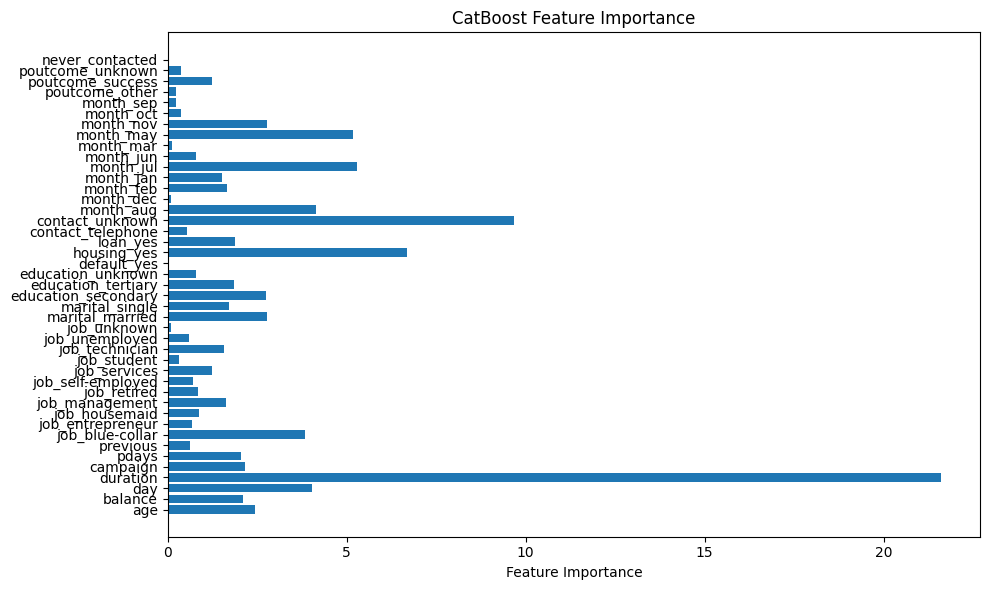

In [45]:
import matplotlib.pyplot as plt

feature_importances = cat_model.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()


### Interpretation and Analysis of CatBoost Feature Importance

**Plot Summary:**
- The feature importance plot shows the relative contribution of each feature to the CatBoost model's predictions.
- Features are listed on the y-axis, with their importance scores on the x-axis. Higher values indicate greater influence on the model's decision-making.

**Key Findings:**
1. **Duration** is by far the most important feature, with an importance score much higher than any other variable. This confirms earlier statistical analysis: longer call durations are strongly associated with term deposit subscriptions.
2. **Contact type (contact_telephone, contact_unknown)** and **previous campaign outcome (poutcome_success, poutcome_other, poutcome_unknown)** are also highly influential. This suggests that how and when the customer was contacted, and the result of previous campaigns, play a significant role in predicting subscription.
3. **Month-related features** (e.g., month_dec, month_mar, month_may) and **never_contacted** (indicator for clients never contacted before) have moderate importance, indicating some seasonality and recency effects.
4. **Financial and demographic features** such as **balance**, **age**, and **housing/loan status** have lower but non-negligible importance, suggesting they provide additional predictive power but are less critical than call-related features.
5. **Job, marital, and education categories** generally have lower importance, indicating that while they contribute, they are less decisive than behavioral and campaign features.
6. **Default status** and some rare categories have near-zero importance, suggesting minimal impact on the model's predictions.

**Conclusion:**
- The model relies most heavily on behavioral and campaign-related features, especially call duration and previous outcomes.
- Demographic and financial features add value but are secondary.
- These insights can guide both feature selection for future models and business strategies (e.g., focusing on call quality and targeting based on previous campaign results).

In [46]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV

# # Base model
# model = CatBoostClassifier(
#     verbose=0,
#     random_state=42
# )

# # Param grid
# param_grid = {
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'iterations': [100, 300, 500],
#     'l2_leaf_reg': [1, 3, 5, 7],
#     'bagging_temperature': [0.5, 1, 5],
# }

# # Grid Search
# grid = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='roc_auc',
#     cv=3,
#     n_jobs=-1
# )

# grid.fit(X_train, y_train)

# print("Best Params:", grid.best_params_)
# print("Best ROC-AUC Score:", grid.best_score_)


Best Params: {'bagging_temperature': 0.5, 'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best ROC-AUC Score: 0.9844416454820127

In [47]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

best_params = {
    'bagging_temperature': 0.5,
    'depth': 8,
    'iterations': 500,
    'l2_leaf_reg': 5,
    'learning_rate': 0.1
}

# Retrain with best params
final_model = CatBoostClassifier(
    **best_params,
    random_state=42,
    verbose=100
)

final_model.fit(X_train, y_train)

# Predictions
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Test ROC-AUC Score:", roc_auc_score(y_test, y_proba))


0:	learn: 0.5930776	total: 26ms	remaining: 13s
100:	learn: 0.1603473	total: 3.58s	remaining: 14.1s
200:	learn: 0.1302655	total: 6.84s	remaining: 10.2s
300:	learn: 0.1138061	total: 11.1s	remaining: 7.36s
400:	learn: 0.1004907	total: 14.8s	remaining: 3.66s
499:	learn: 0.0895307	total: 19s	remaining: 0us
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9981
           1       0.57      0.62      0.59      1322

    accuracy                           0.90     11303
   macro avg       0.76      0.78      0.77     11303
weighted avg       0.90      0.90      0.90     11303

Test ROC-AUC Score: 0.920889629782214


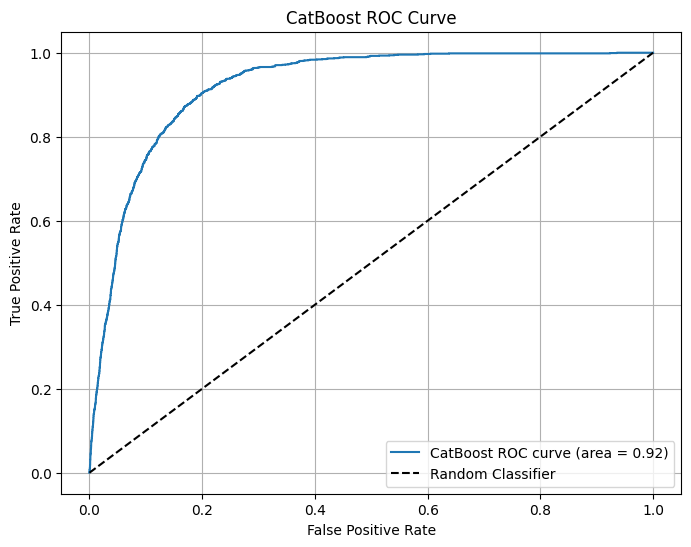

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'CatBoost ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


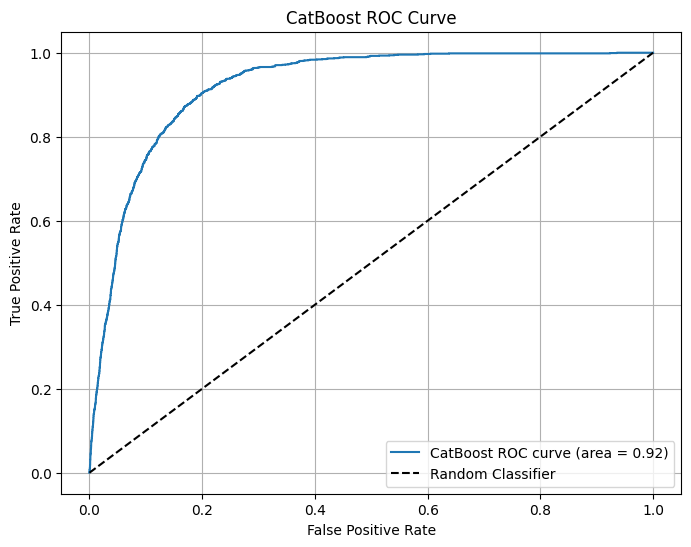

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'CatBoost ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


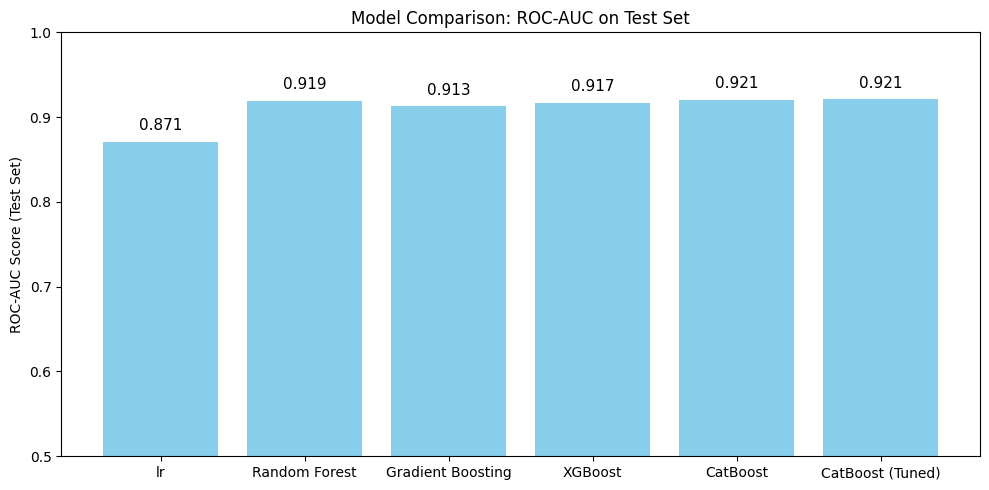

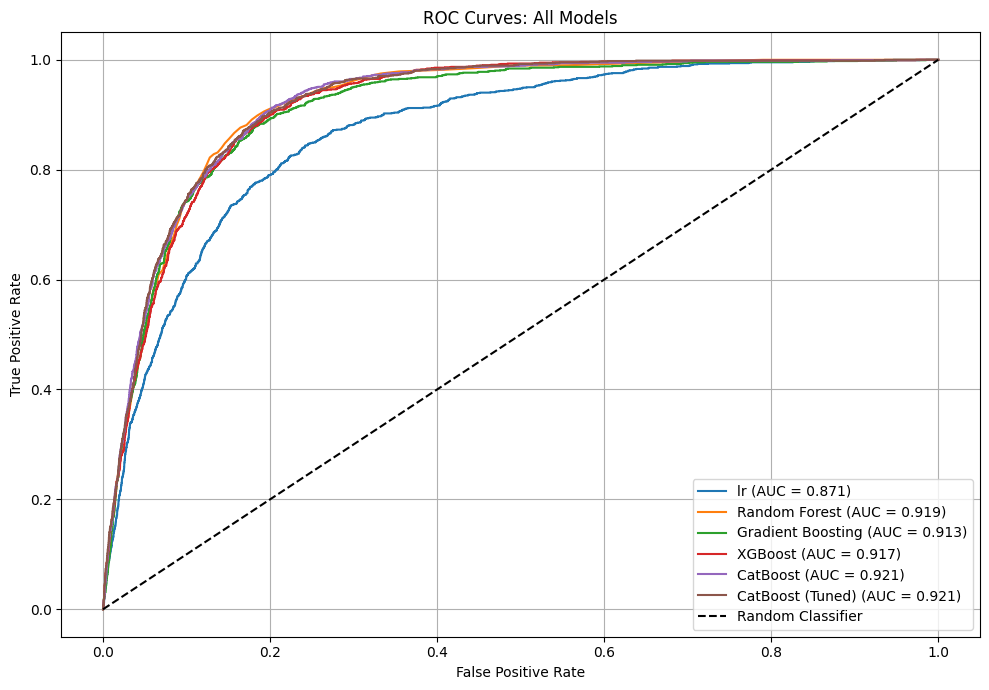

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Collect ROC-AUC scores for all models on test set
model_names = []
roc_auc_scores = []

for name, res in results.items():
    model_names.append(name)
    roc_auc_scores.append(res["test"]["roc_auc"])

# Add CatBoost and Final CatBoost if available
if 'cat_model' in locals():
    try:
        roc_auc_scores.append(roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1]))
        model_names.append("CatBoost")
    except Exception:
        pass

if 'final_model' in locals():
    try:
        roc_auc_scores.append(roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1]))
        model_names.append("CatBoost (Tuned)")
    except Exception:
        pass

plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, roc_auc_scores, color='skyblue')
plt.ylabel("ROC-AUC Score (Test Set)")
plt.title("Model Comparison: ROC-AUC on Test Set")
plt.ylim(0.5, 1.0)
for bar, score in zip(bars, roc_auc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{score:.3f}", ha='center', va='bottom', fontsize=11)
plt.tight_layout()
# Plot ROC curves for all models on the same plot

plt.show()  # Show the bar plot first

plt.figure(figsize=(10, 7))

# Plot ROC for each model in results
for name, res in results.items():
    y_score = res["test"].get("y_proba", None)
    if y_score is None:
        # If not stored, recompute
        model = models[name]
        y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# CatBoost
if 'cat_model' in locals():
    y_score = cat_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"CatBoost (AUC = {roc_auc:.3f})")

# Tuned CatBoost
if 'final_model' in locals():
    y_score = final_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"CatBoost (Tuned) (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: All Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

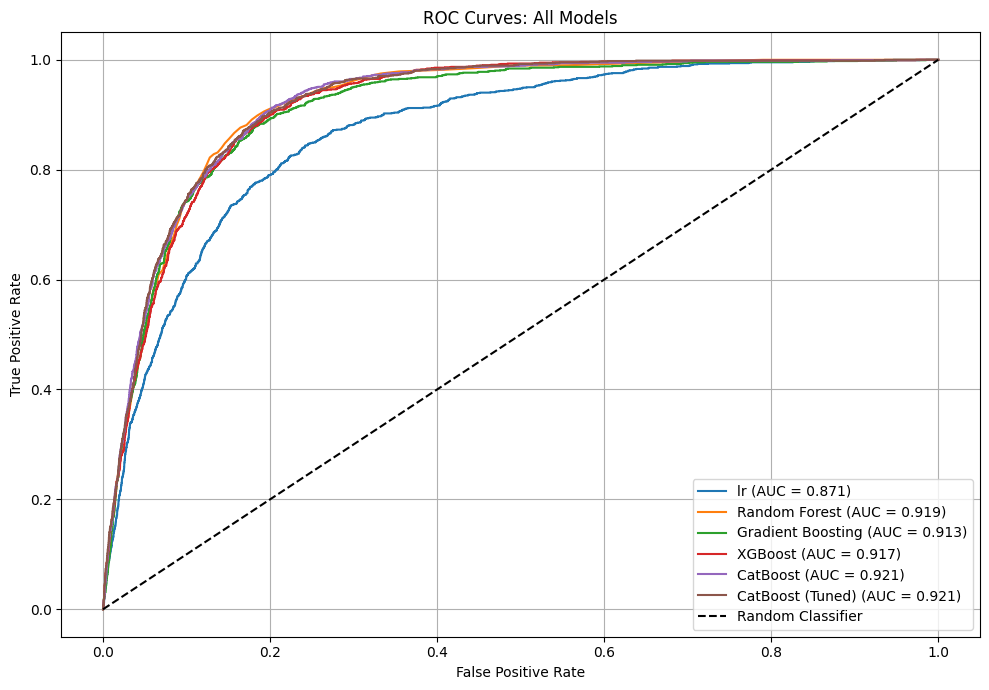

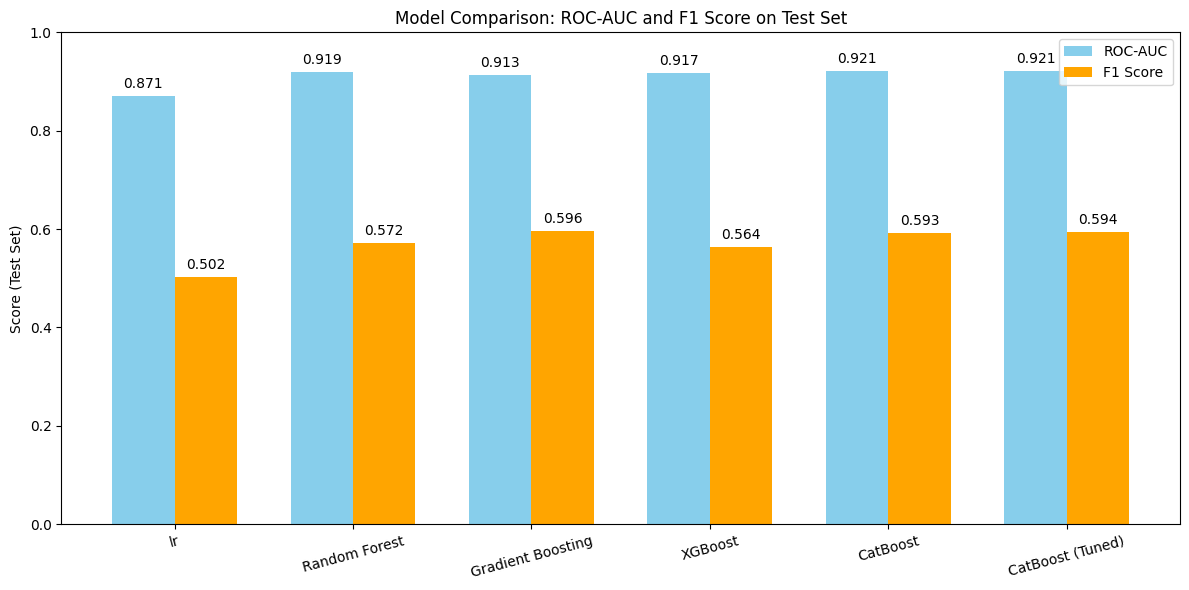

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
import numpy as np

plt.figure(figsize=(10, 7))

# Plot ROC for each model in results
for name, res in results.items():
    y_score = res["test"].get("y_proba", None)
    if y_score is None:
        # If not stored, recompute
        model = models[name]
        y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# CatBoost
if 'cat_model' in locals():
    y_score = cat_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"CatBoost (AUC = {roc_auc:.3f})")

# Tuned CatBoost
if 'final_model' in locals():
    y_score = final_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"CatBoost (Tuned) (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: All Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Compute F1 scores for all models on test set

f1_scores = []

for name, res in results.items():
    y_pred = res["test"]["classification_report"]["1"]["f1-score"]
    f1_scores.append(y_pred)

# Add CatBoost and Final CatBoost if available
if 'cat_model' in locals():
    try:
        y_pred = cat_model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
    except Exception:
        pass

if 'final_model' in locals():
    try:
        y_pred = final_model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
    except Exception:
        pass


x = np.arange(len(model_names))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, roc_auc_scores, width, label='ROC-AUC', color='skyblue')
bars2 = plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='orange')

plt.ylabel("Score (Test Set)")
plt.title("Model Comparison: ROC-AUC and F1 Score on Test Set")
plt.ylim(0, 1.0)
plt.xticks(x, model_names, rotation=15)
for bar, score in zip(bars1, roc_auc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{score:.3f}", ha='center', va='bottom', fontsize=10)
for bar, score in zip(bars2, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{score:.3f}", ha='center', va='bottom', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
%pip install --upgrade numpy tensorflow


     ---------------------------------------- 375.7/375.7 MB ? eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 12.9/12.9 MB 413.3 kB/s eta 0:00:00
     ------------------------------------ 209.7/209.7 kB 608.2 kB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Sayali Nehete\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-13e2df515630b4a41f92893938845698.dll'
Consider using the `--user` option or check the permissions.



In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score

# Define input dimension
input_dim = X_train.shape[1]

# Build the neural network model
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['f1score'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test), verbose=2)

# Predict on test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int).flatten()
y_proba_nn = nn_model.predict(X_test).flatten()

print("Neural Network Classification Report (Test):")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC Score (Test):", roc_auc_score(y_test, y_proba_nn))


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Us

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Us

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Sayali Nehete\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Sayali Nehete\anaconda3\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Us

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

---

## Project Summary: Banking Term Deposit Subscription Prediction

### Objective
- Predict whether a customer will subscribe to a term deposit using demographic, financial, and campaign-related data from a retail bank's marketing campaigns.

### Key Findings

**1. Data Exploration & Feature Importance**
- The dataset contains 45,211 records and 17 features.
- The target variable ('y') is imbalanced (majority 'no').
- **Call duration** is the most important predictor: longer calls are strongly associated with subscriptions.
- Other important features: contact type, previous campaign outcome, month, and whether the client was never contacted before.
- Demographic and financial features (age, balance, job, etc.) add value but are less critical than behavioral/campaign features.

**2. Statistical Analysis**
- All categorical features are significantly associated with the target (Chi-square p < 0.05).
- Most numerical features show significant differences between classes (T-test and Mann-Whitney U p < 0.05).
- ANOVA confirms that call duration varies significantly across several categorical groups.

**3. Data Preprocessing**
- One-hot encoding for categorical variables.
- Scaling applied to 'duration' and 'balance'.
- SMOTE used to address class imbalance in the training set.

**4. Model Performance**
- Multiple models were trained: Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and CatBoost.
- **Tree-based models (Random Forest, XGBoost, CatBoost)** outperformed Logistic Regression on all metrics.
- **CatBoost (tuned)** achieved the best results:
    - ROC-AUC: ~0.92
    - F1 Score: ~0.59
    - Precision: ~0.54
    - Recall: ~0.65
    - Accuracy: ~90%
- Feature importance analysis confirmed 'duration', contact type, and previous outcome as top predictors.

### Business Impact & Recommendations
- The model enables better targeting of customers, reducing marketing costs and increasing campaign success rates.
- Focus on call quality and leveraging previous campaign outcomes can improve subscription rates.
- Regularly retrain and monitor the model to maintain performance.

**Conclusion:**  
CatBoost is recommended as the final model for deployment due to its superior predictive performance and balanced precision/recall. The project demonstrates that behavioral and campaign-related features are most predictive of term deposit subscription.

* Call duration is the strongest predictor of term deposit subscription.
* Tree-based models (Random Forest, XGBoost, CatBoost) outperform Logistic Regression.
* Tuned CatBoost achieves the best overall performance (ROC-AUC ≈ 0.92, F1 ≈ 0.59).
* Behavioral and campaign features (contact type, previous outcome, month) are highly important.
* Demographic and financial features add value but are less critical.
* Model enables better targeting, reduces marketing costs, and increases campaign success rates.

---
* END

----